## On-line force capability evaluation based on efficient polytope vertex search

Short script demonstrating usage of python module

In [1]:
import pycapacity as capacity # new force capacity module
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## 3d polytope visalisaiton functions

In [2]:
def plot_polytope_faces_3d(faces, face_color=None, edge_color=None, alpha=None,label=None):
    for polygone in faces:
        poly = Poly3DCollection(list([zip(polygone[0,:],polygone[1,:],polygone[2,:])]))
        if alpha != None:
            poly.set_alpha(alpha)
        if face_color != None:
            poly.set_facecolor(face_color)
        if edge_color != None:
            poly.set_edgecolor(edge_color)
        ax.add_collection3d(poly)
        
    poly._edgecolors2d=poly._edgecolors3d
    poly._facecolors2d=poly._facecolors3d
    if label != None:
        poly.set_label(label)
        
def plot_polytope_vertex_3d(ax, vertex, label=None, color='black'):
    if label != None:
        ax.scatter(vertex[0,:],vertex[1,:],vertex[2,:],color=color, label=label)
    else:
        ax.scatter(vertex[0,:],vertex[1,:],vertex[2,:],color=color)        

## Four link planar robot example

Force polytope and ellispoid example calculaton using the newly developed force capacity calculation python module

`n=4` and `m=2`

In [3]:
# jacobian function for four link planar robot
def four_link_jacobian(joints):
    sq1 = np.sin(joints[0])
    sq12 = np.sin(joints[0] + joints[1])
    sq123 = np.sin(joints[0] + joints[1] + joints[2])
    sq1234 = np.sin(joints[0] + joints[1] + joints[2] + joints[3])
    cq1 = np.cos(joints[0])
    cq12 = np.cos(joints[0] + joints[1])
    cq123 = np.cos(joints[0] + joints[1] + joints[2])
    cq1234 = np.cos(joints[0] + joints[1] + joints[2] + joints[3])
    return np.array([[0.5*cq1+0.5*cq12+0.5*cq123+0.7*cq1234, 0.5*cq12+0.5*cq123+0.7*cq1234, 0.5*cq123+0.7*cq1234, +0.7*cq1234], [-0.5*sq1-0.5*sq12-0.5*sq123-0.7*sq1234, -0.5*sq12-0.5*sq123-0.7*sq1234, -0.5*sq123-0.7*sq1234, -0.7*sq1234]])
# inertia matrix of a four link planar robot
def four_link_inertia(joints):
    sq1 = np.sin(joints[1])
    cq1 = np.cos(joints[1])
    sq2 = np.sin(joints[2])
    cq2 = np.cos(joints[2])
    sq3 = np.sin(joints[3])
    cq3 = np.cos(joints[3])
    return np.reshape([cq1*(5.0/8.0)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/8.0)+(cq2*cq3)/8.0-sq1*sq2*(3.0/8.0)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/8.0-(cq1*sq2*sq3)/8.0-(cq2*sq1*sq3)/8.0-(cq3*sq1*sq2)/8.0+7.0/8.0,cq1*(5.0/1.6e+1)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/8.0-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.5e+1/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/1.6e+1-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+3.0/1.6e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.0/3.2e+1,cq1*(5.0/1.6e+1)+cq2*(3.0/8.0)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/8.0-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/8.0+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.5e+1/3.2e+1,cq2*(3.0/8.0)+cq3/8.0+(cq2*cq3)/8.0-(sq2*sq3)/8.0+1.5e+1/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+3.0/1.6e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+1.0/3.2e+1,cq2*(3.0/1.6e+1)+cq3/8.0+cq1*cq2*(3.0/1.6e+1)+(cq2*cq3)/1.6e+1-sq1*sq2*(3.0/1.6e+1)-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+3.0/1.6e+1,cq2*(3.0/1.6e+1)+cq3/8.0+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+3.0/1.6e+1,cq3/8.0+3.0/1.6e+1,cq3/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+(cq1*cq2*cq3)/1.6e+1-(cq1*sq2*sq3)/1.6e+1-(cq2*sq1*sq3)/1.6e+1-(cq3*sq1*sq2)/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+(cq2*cq3)/1.6e+1-(sq2*sq3)/1.6e+1+1.0/3.2e+1,cq3/1.6e+1+1.0/3.2e+1,1.0/3.2e+1],[4,4]);


## Force polytope and manipulability ellipsoid

In [20]:
# joint positions q
q  = np.random.rand(4)*np.pi
# joint torque limits tau
tau_min = np.array([[-1], [-1], [-1], [-1]])
tau_max = np.array([[1], [1], [1], [1]])

# jacobian
J = four_link_jacobian(q)
# calculate the velocity polytope
f_vert, faces = capacity.force_polytope_withfaces(J,tau_min,tau_max)
# calculate the velocity ellipsoid
S,U = capacity.force_ellipsoid(J, tau_max)

<IPython.core.display.Javascript object>


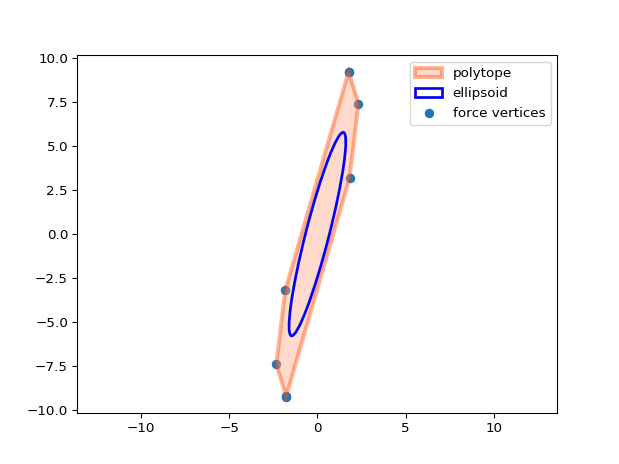

In [21]:
# visualise polytope ellispoid
%matplotlib notebook
fig = plt.figure(10)
ax = fig.gca()
plt.scatter(f_vert[0,:],f_vert[1,:], label="force vertices")
plt.fill(faces[0][0,:],faces[0][1,:], alpha=0.4, facecolor='lightsalmon', edgecolor='orangered', linewidth=3,label='polytope')
ellipse = Ellipse(xy=(0, 0), width=2*S[1], height=2*S[0], 
                        edgecolor='b', fc='None', lw=2, angle=-np.arctan2(U[0,0],U[0,1])*180/np.pi,label='ellipsoid')
ax.add_patch(ellipse)
plt.axis('equal')
plt.legend()
plt.show()

## Acceleration polytope and acceleration ellipsoid

In [6]:
##### joint positions q
q  = np.random.rand(4)*np.pi
# joint torque limits tau
tau_min = np.array([[-1], [-1], [-1], [-1]])
tau_max = np.array([[1], [1], [1], [1]])

# jacobian
J = four_link_jacobian(q)
# jacobian
M = four_link_inertia(q)
# calculate the acceleration polytope
acc_vert, faces = capacity.acceleration_polytope_withfaces(J, M, tau_min ,tau_max)
# calculate the acceleration ellipsoid
S,U = capacity.acceleration_ellipsoid(J, M, tau_max)

<IPython.core.display.Javascript object>


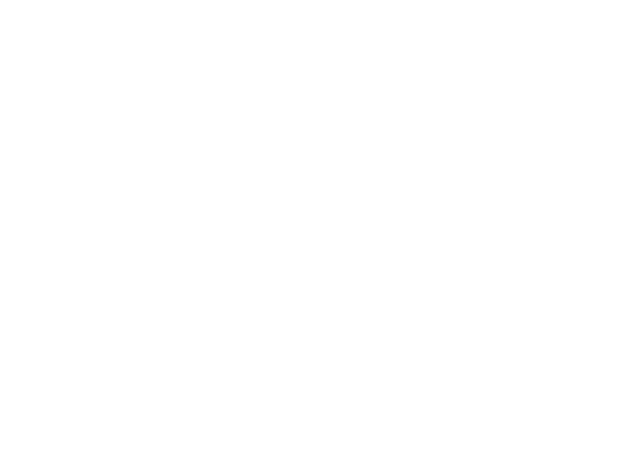

In [7]:
# visualise polytope ellispoid
%matplotlib notebook
fig = plt.figure(13)
ax = plt.gca()
plt.scatter(acc_vert[0,:],acc_vert[1,:], label="vertices")
for face in faces:
    plt.fill(face[0,:],face[1,:], alpha=0.4, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ellipse = Ellipse(xy=(0, 0), width=2*S[1], height=2*S[0], 
                        edgecolor='b', fc='None', lw=2, angle=-np.arctan2(U[0,0],U[0,1])*180/np.pi,label='ellipsoid')
ax.add_patch(ellipse)
plt.axis('equal')
plt.legend()
plt.show()

## Velocity polytope and manipulability ellipsoid

In [8]:
##### joint positions q
q  = np.random.rand(4)*np.pi
# joint torque limits tau
dq_min = 2*np.array([[-1], [-1], [-1], [-1]])
dq_max = 2*np.array([[1], [1], [1], [1]])

# jacobian
J = four_link_jacobian(q)
# calculate the force polytope
vel_vert, faces = capacity.velocity_polytope_withfaces(J, dq_min ,dq_max)
# calculate the force ellipsoid
S,U = capacity.velocity_ellipsoid(J, dq_max)

<IPython.core.display.Javascript object>


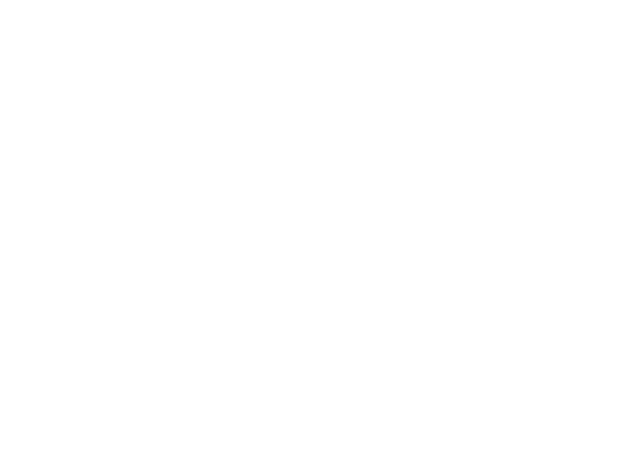

In [9]:
# visualise polytope ellispoid
%matplotlib notebook
fig = plt.figure(11)
ax = plt.gca()
plt.scatter(vel_vert[0,:],vel_vert[1,:], label="vertices")
for face in faces:
    plt.fill(face[0,:],face[1,:], alpha=0.4, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ellipse = Ellipse(xy=(0, 0), width=2*S[1], height=2*S[0], 
                        edgecolor='b', fc='None', lw=2, angle=-np.arctan2(U[0,0],U[0,1])*180/np.pi,label='ellipsoid')
ax.add_patch(ellipse)
plt.axis('equal')
plt.legend()
plt.show()

## Generic 3D robot example
`m=3`
Define jacobian matrix and torque limits

In [10]:
m = 3 # 3d forces
n = 6 # robot dof 
J = np.array(np.random.rand(m,n))
# torque limits
t_min = -10*np.ones((n,1))
t_max = 10*np.ones((n,1))
# velocity limits
dq_min = -np.ones((n,1))
dq_max = np.ones((n,1))

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [11]:
f_vert, faces_force = capacity.force_polytope_withfaces(J,t_max,t_min)

Calculate the velocity polytope vertices
```
v = J dq
s.t. dq_min <  dq < dq_max
```

In [12]:
vel_vert, faces_velocity = capacity.velocity_polytope_withfaces(J,dq_max,dq_min)

Visualise the vertices force and velocity polytopes: `f_vert` and `vel_vert`

<IPython.core.display.Javascript object>


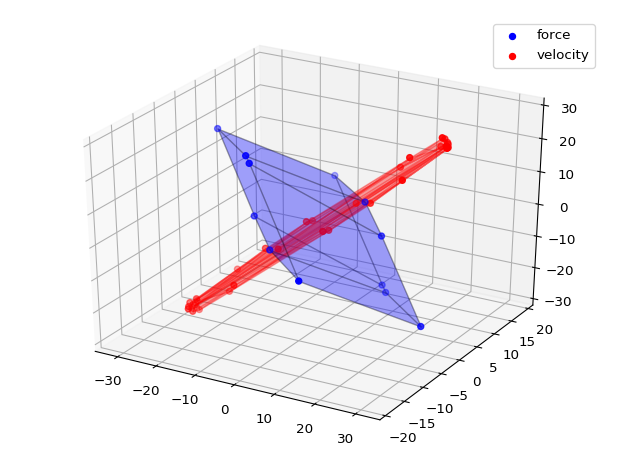

In [13]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

# plot polygones
plot_polytope_faces_3d(faces=faces_force, face_color='blue', edge_color='black',alpha=0.2)
plot_polytope_vertex_3d(ax=ax, vertex=f_vert,label='force',color='blue')
    
# plot polygones
plot_polytope_faces_3d(faces=faces_velocity, face_color='red', edge_color='red',alpha=0.2)
plot_polytope_vertex_3d(ax=ax, vertex=vel_vert, label='velocity',color='red')

plt.tight_layout()
plt.legend()
plt.show()

## Intersection example
`m=3`
Define jacobian matrix and torque limits

In [14]:
m = 3 # 3d forces
n = 6 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones((n,1))
t_max = -np.ones((n,1))

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [15]:
f_vert1, polytopes1 = capacity.force_polytope_withfaces(J1, t_max, t_min)
f_vert2, polytopes2 = capacity.force_polytope_withfaces(J2, t_max, t_min)
f_vert_int, polytopes_int = capacity.force_polytope_intersection_withfaces(J1,J2,t_max,t_min,t_max,t_min)

Visualise the vertices `f_vert`

<IPython.core.display.Javascript object>


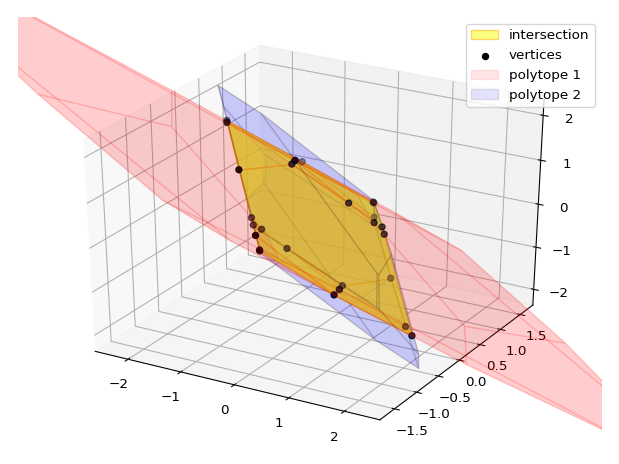

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')

# intersection polytope
plot_polytope_faces_3d(faces=polytopes_int, face_color='yellow', edge_color='orange',label='intersection', alpha=0.5)
plot_polytope_vertex_3d(ax=ax, vertex=f_vert_int,label='vertices')
    
# polytope1
plot_polytope_faces_3d(faces=polytopes1, face_color='red', edge_color='red',label='polytope 1', alpha=0.1)
# polytope2
plot_polytope_faces_3d(faces=polytopes2, face_color='blue', edge_color='black',label='polytope 2', alpha=0.1)


ax.autoscale(enable=True) 
fig.tight_layout()
plt.legend()
plt.show()

## Minkowski sum example
`m=3`
Define jacobian matrix and torque limits

In [17]:
m = 3 # 3d forces
n = 4 # robot dof 
J1 = np.array(np.random.rand(m,n))
J2 = np.array(np.random.rand(m,n))
t_min = np.ones((n,1))
t_max = -np.ones((n,1))

Calculate the force polytope vertices
```
t_min <  J^T.f < t_max
```

In [18]:
f_vert1, polytopes1 = capacity.force_polytope_withfaces(J1, t_max, t_min)
f_vert2, polytopes2 = capacity.force_polytope_withfaces(J2, t_max, t_min)
f_vert_int, polytopes_int = capacity.force_polytope_sum_withfaces(J1,J2,t_max,t_min,t_max,t_min)

Visualise the vertices `f_vert`

<IPython.core.display.Javascript object>


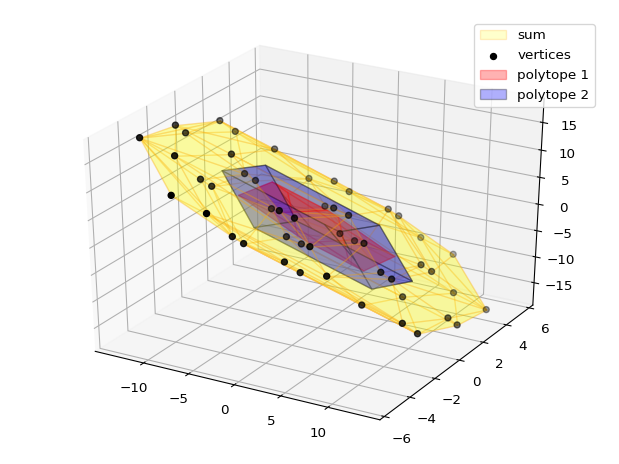

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')



# intersection polytope
plot_polytope_faces_3d(faces=polytopes_int, face_color='yellow', edge_color='orange',label='sum', alpha=0.2)
plot_polytope_vertex_3d(ax=ax, vertex=f_vert_int,label='vertices')
    
# polytope1
plot_polytope_faces_3d(faces=polytopes1, face_color='red', edge_color='red',label='polytope 1', alpha=0.3)
# polytope2
plot_polytope_faces_3d(faces=polytopes2, face_color='blue', edge_color='black',label='polytope 2', alpha=0.3)


ax.autoscale(enable=True) 
fig.tight_layout()
plt.legend()
plt.show()